In [9]:
import os
import networkx as nx
from networkx.algorithms import bipartite
import community as community_louvain
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
import pandas as pd
import numpy as np

In [10]:
os.getcwd()

'/home/tduricic/Development/workspace/elliot/notebooks'

In [11]:
ciao_ratings_filename = '../data/ciao/processed/ratings.tsv'
def create_ratings_bipartite_graph(filename):
    users = set()
    items = set()
    user_items_dict = {}
    edges = []
    with open(filename) as fr:
        for line in fr.readlines():
            tokens = line.split()
            userId = tokens[0]
            itemId = tokens[1]
            # For now we omit the weight
            # rating = float(tokens[2])

            users.add(userId)
            items.add(itemId)
            edges.append((userId, itemId))
            if userId not in user_items_dict:
                user_items_dict[userId] = []
                user_items_dict[userId].append(itemId)
            else:
                user_items_dict[userId].append(itemId)
    B = nx.Graph()
    B.add_nodes_from(users, bipartite=0)
    B.add_nodes_from(items, bipartite=1)
    B.add_edges_from(edges)

    return B, user_items_dict, users, items

In [12]:
B, user_items_dict, users, items = create_ratings_bipartite_graph(ciao_ratings_filename)

In [13]:
projected_G = bipartite.projected_graph(B, items)

In [44]:
print(len(projected_G.edges))

4594104


In [14]:
partition = community_louvain.best_partition(projected_G)

In [15]:
partition

{'11102': 4,
 '6210': 1,
 '745': 1,
 '1533': 11,
 '6571': 3,
 '7039': 7,
 '8282': 7,
 '8303': 5,
 '9030': 7,
 '10151': 3,
 '818': 3,
 '6558': 7,
 '14676': 3,
 '7056': 3,
 '2043': 7,
 '14678': 6,
 '570': 7,
 '5016': 3,
 '15353': 1,
 '5513': 7,
 '955': 11,
 '15026': 7,
 '354': 5,
 '3762': 7,
 '14529': 3,
 '1491': 3,
 '15251': 7,
 '7904': 1,
 '9361': 1,
 '2614': 5,
 '1394': 3,
 '9901': 7,
 '9700': 7,
 '8253': 6,
 '4359': 7,
 '9383': 7,
 '951': 7,
 '7706': 6,
 '5651': 1,
 '2843': 7,
 '4553': 5,
 '3661': 7,
 '10921': 7,
 '11183': 4,
 '11750': 7,
 '13237': 3,
 '13835': 7,
 '6786': 3,
 '178': 3,
 '756': 5,
 '9436': 7,
 '1795': 7,
 '1461': 7,
 '1850': 6,
 '1787': 7,
 '4780': 7,
 '11760': 7,
 '15155': 9,
 '9370': 5,
 '15400': 9,
 '16077': 9,
 '4122': 3,
 '5000': 7,
 '11072': 3,
 '14900': 7,
 '4353': 7,
 '7474': 3,
 '8768': 3,
 '9468': 7,
 '4377': 7,
 '14331': 3,
 '12063': 3,
 '3737': 7,
 '14031': 7,
 '9412': 6,
 '6868': 5,
 '5': 7,
 '2424': 7,
 '4651': 5,
 '9423': 4,
 '14583': 10,
 '5529': 11,


In [16]:
community_lists = {}
for key in partition:
    if partition[key] not in community_lists:
        community_lists[partition[key]] = []
        community_lists[partition[key]].append(key)
    else:
        community_lists[partition[key]].append(key)

In [17]:
len(community_lists)

12

In [18]:
community_sizes = {}
for key in community_lists:
    community_sizes[key] = len(community_lists[key])

In [19]:
community_sizes

{4: 177,
 1: 1416,
 11: 850,
 3: 2915,
 7: 8371,
 5: 1358,
 6: 790,
 9: 543,
 10: 608,
 0: 276,
 2: 175,
 8: 136}

In [20]:
community_sizes_list = list(community_sizes.values())

In [21]:
community_sizes_list.sort(reverse=True)

In [22]:
community_sizes_list

[8371, 2915, 1416, 1358, 850, 790, 608, 543, 276, 177, 175, 136]

In [23]:
community_ids = range(1, len(community_sizes)+1)

In [24]:
df = pd.DataFrame({"Community id":community_ids, "Community size":community_sizes_list})

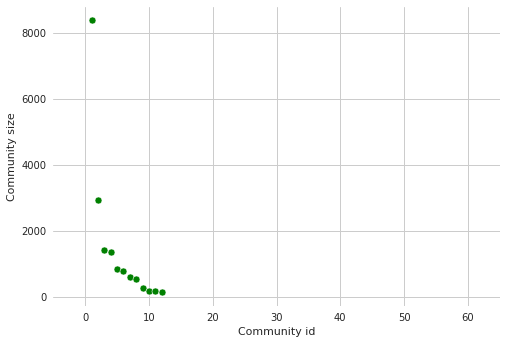

In [25]:
sns.set_style('whitegrid')
ax = sns.scatterplot(data=df, x='Community id', y='Community size', color='green')

ax.set(xlim=(-5, 65))
# ax.set(ylim=(-0.1, 3.2))
# ax.set(xticklabels=['',1,'',10,'',100,'',1000,'',10000])
# ax.set(yticklabels=['',1,'',10,'',100,'',1000])
sns.set(font_scale = 1.5)

# plt.savefig('../plots/community_size_distribution1.pdf', bbox_inches='tight')
plt.show()

In [26]:
user_communities_interactions_dict = {}
for userId in user_items_dict:
    if userId not in user_communities_interactions_dict:
        user_communities_interactions_dict[userId] = [0] * len(community_lists)
    for itemId in user_items_dict[userId]:
        user_communities_interactions_dict[userId][partition[itemId]] += 1

In [27]:
x = np.array(user_communities_interactions_dict['1'])
x

array([ 0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  1])

In [31]:
np.sum(x/np.max(x))/x.shape[0]

TypeError: unsupported operand type(s) for /: 'dict_values' and 'dict_values'

In [32]:
user_diversities = {}
for userId in user_communities_interactions_dict:
    user_community_vector = np.array(user_communities_interactions_dict[userId])
    user_diversities[userId] = np.sum(user_community_vector/np.max(user_community_vector))/user_community_vector.shape[0]

In [33]:
x = np.array(user_diversities.values())

In [34]:
user_diversities_filtered = {}
for userId in user_diversities:
    if user_diversities[userId] > 0 and user_diversities[userId] <=1:
        user_diversities_filtered[userId] = user_diversities[userId]

In [35]:
user_diversities_df = pd.DataFrame({'userId':list(user_diversities_filtered.keys()), 'diversity':list(user_diversities_filtered.values())})

In [36]:
user_diversities_df

,userId,diversity
0,1,0.089744
1,2,0.104167
2,3,0.166667
3,4,0.127451
4,5,0.086667
...,...,...
17610,17611,0.083333
17611,17612,0.083333
17612,17613,0.083333
17613,17614,0.083333


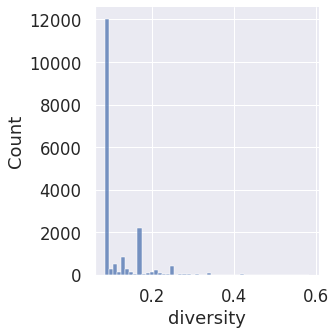

In [37]:
sns.displot(user_diversities_df, x="diversity", bins=50)

In [41]:
source_diversities = []
target_diversities = []
ciao_social_filename = '../data/ciao/processed/social_connections.tsv'
with open(ciao_social_filename) as fr:
        for line in fr.readlines():
            tokens = line.split()
            source_user = tokens[0]
            target_user = tokens[1]
            if source_user in user_diversities_filtered and target_user in user_diversities_filtered:
                source_diversities.append(user_diversities_filtered[source_user])
                target_diversities.append(user_diversities_filtered[target_user])

In [42]:
source_diversities = np.array(source_diversities)
target_diversities = np.array(target_diversities)

In [43]:
from scipy.stats.stats import pearsonr
pearsonr(source_diversities, target_diversities)[0]

0.02861294115035136